In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/PECAN/pecan")
from ripser import Ripser
from kernels import alpha_decaying_kernel
from functions import diffusion_map, make_diffusion, visuallize_diffusion_map, petals

In [2]:
from sklearn.metrics.pairwise import euclidean_distances

def calculate_lawvere_homology_logp(P):
    # in the code it is 
    # A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    A = - np.log(P)
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return points

def calculate_lawvere_homology_diffu_dist(P, t=1):
    # in the code it is 
    # A_comp = 1 - np.diag(np.sqrt(1/d)) @ K @ np.diag(np.sqrt(1/d))
    lam, phi = diffusion_map(P)
    Xd = lam ** t * phi
    A = euclidean_distances(Xd)
    tuples, points = Ripser(dimension=1)(A)
    # tuples_comp, points_comp = Ripser(dimension=1)(A_comp)
    # Add additional information about the dimension of each
    # topological feature.
    dimension = np.asarray([len(c) - 1 for c, _ in tuples])

    # Adds the dimension as an additional column, turning the 2D
    # points of the diagram into 3D points.
    points = np.column_stack((points, dimension))
    return points


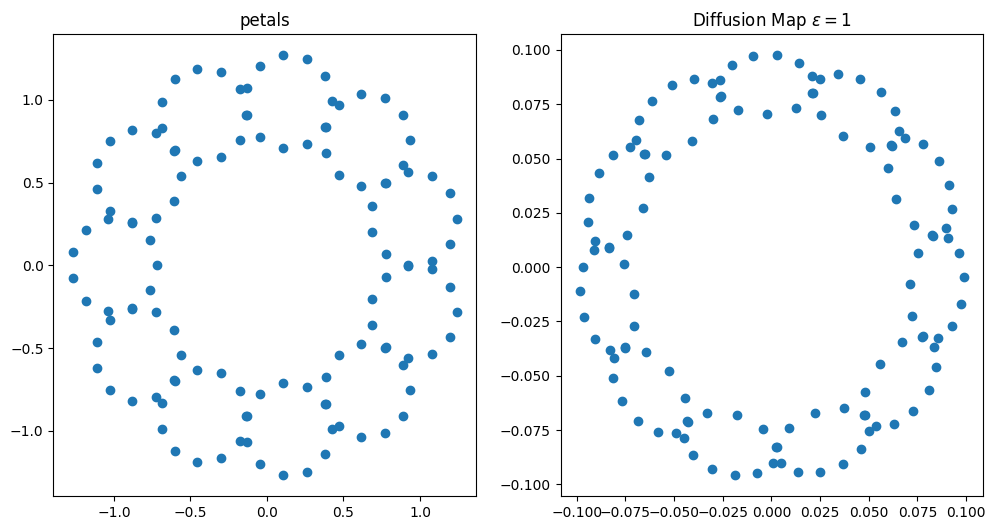

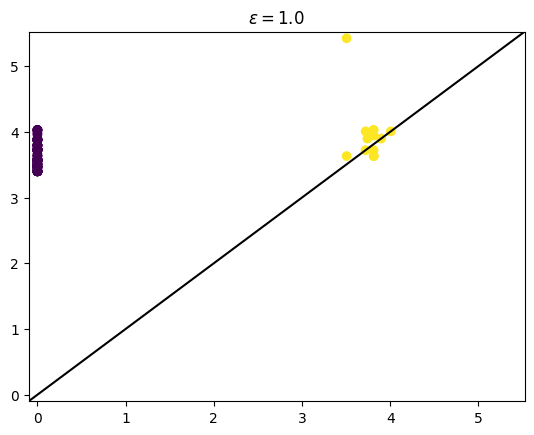

In [8]:
epsilon = 1.
t = 1.
X, _ = petals(128)
P = make_diffusion(X, alpha=2, epsilon=epsilon)
points = calculate_lawvere_homology_logp(P)

visuallize_diffusion_map(X, P, t, name='petals')

plt.figure()
plt.xlim(points[:, :-1].min() - 0.1, points[:, :-1].max() + 0.1)
plt.ylim(points[:, :-1].min() - 0.1, points[:, :-1].max() + 0.1)
plt.axline((-0.1, -0.1), slope=1.0, c='k')
plt.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2])
plt.title(f"$\epsilon=${epsilon}")
plt.show()

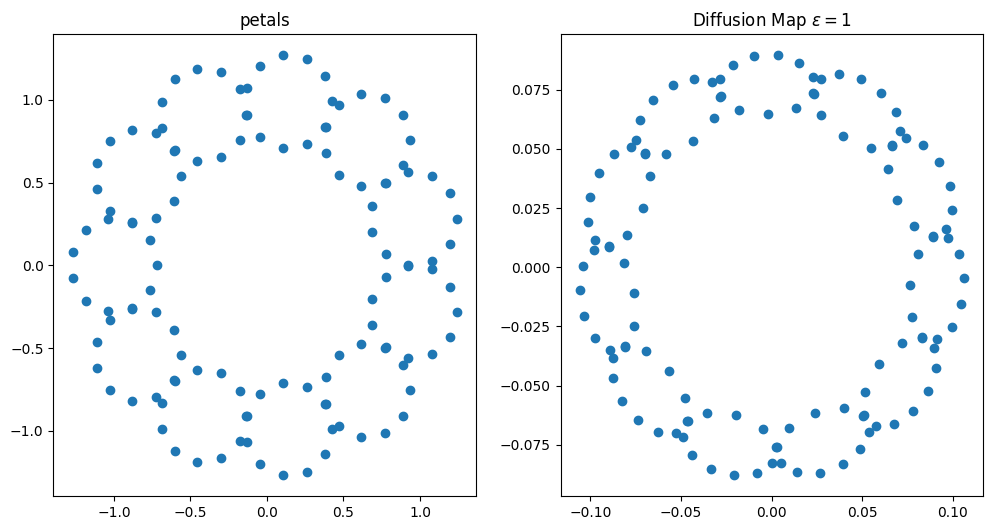

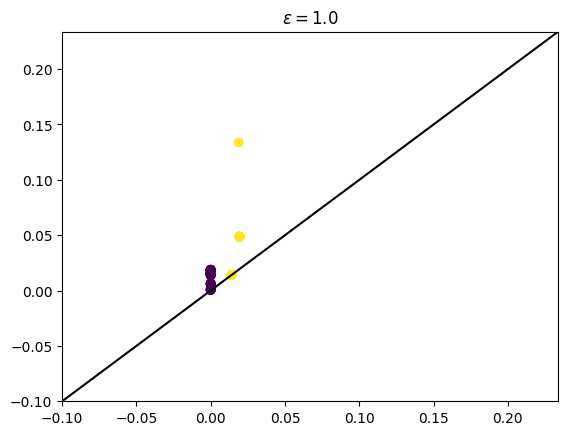

In [10]:
epsilon = 1.
t = 1.
X, _ = petals(128)
P = make_diffusion(X, alpha=2, epsilon=epsilon)

points = calculate_lawvere_homology_diffu_dist(P, t)

visuallize_diffusion_map(X, P, t, name='petals')

plt.figure()
plt.xlim(points[:, :-1].min() - 0.1, points[:, :-1].max() + 0.1)
plt.ylim(points[:, :-1].min() - 0.1, points[:, :-1].max() + 0.1)
plt.axline((-0.1, -0.1), slope=1.0, c='k')
plt.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2])
plt.title(f"$\epsilon=${epsilon}")
plt.show()

In [6]:
points

array([[0.0, 0.00034934517881456064, 0],
       [0.0, 0.0003505269402233007, 0],
       [0.0, 0.0003578579768934213, 0],
       [0.0, 0.0003617637697583398, 0],
       [0.0, 0.0003720935231376002, 0],
       [0.0, 0.00037871123997553944, 0],
       [0.0, 0.0003873474696220708, 0],
       [0.0, 0.00039480242332896133, 0],
       [0.0, 0.0003997332953186553, 0],
       [0.0, 0.0004047429491822886, 0],
       [0.0, 0.0004062366763553877, 0],
       [0.0, 0.0029504643112298868, 0],
       [0.0, 0.002957711152562743, 0],
       [0.0, 0.003021511714014711, 0],
       [0.0, 0.0030490810368809453, 0],
       [0.0, 0.003136329507836889, 0],
       [0.0, 0.0031889603787428594, 0],
       [0.0, 0.0032577529906064858, 0],
       [0.0, 0.0033211407615473826, 0],
       [0.0, 0.0033569533563440456, 0],
       [0.0, 0.003400927865891025, 0],
       [0.0, 0.0034108166970657616, 0],
       [0.0, 0.0054781986642983655, 0],
       [0.0, 0.005514819250281687, 0],
       [0.0, 0.00551491104684217, 0],
    

In [ ]:
lam, phi = diffusion_map(P)
Xd = lam ** t * phi
A = euclidean_distances(Xd)
B = np.sqrt(np.sum((Xd[:, np.newaxis, :] - Xd[np.newaxis, :, :]) ** 2, axis=-1))

In [ ]:
Xd.shape

(121, 10)

In [ ]:
A

array([[0.        , 0.01809586, 0.03260781, ..., 0.03303377, 0.03228411,
        0.04640908],
       [0.01809586, 0.        , 0.01564577, ..., 0.0159372 , 0.01587969,
        0.0334461 ],
       [0.03260781, 0.01564577, 0.        , ..., 0.00065581, 0.01674544,
        0.03487555],
       ...,
       [0.03303377, 0.0159372 , 0.00065581, ..., 0.        , 0.01639734,
        0.03441064],
       [0.03228411, 0.01587969, 0.01674544, ..., 0.01639734, 0.        ,
        0.01903243],
       [0.04640908, 0.0334461 , 0.03487555, ..., 0.03441064, 0.01903243,
        0.        ]])

In [ ]:
- np.log(P)

array([[3.71625895, 3.74145939, 3.80905975, ..., 3.81138092, 3.79715944,
        3.88005614],
       [3.72120535, 3.69600491, 3.72120535, ..., 3.72199467, 3.71494599,
        3.7769054 ],
       [3.72682527, 3.65922491, 3.63402447, ..., 3.63405736, 3.66001423,
        3.72914644],
       ...,
       [3.72914644, 3.66001423, 3.63405736, ..., 3.63402447, 3.65922491,
        3.72682527],
       [3.7769054 , 3.71494599, 3.72199467, ..., 3.72120535, 3.69600491,
        3.72120535],
       [3.88005614, 3.79715944, 3.81138092, ..., 3.80905975, 3.74145939,
        3.71625895]])

In [54]:
from sklearn.decomposition import PCA

def visualize_diffusion_map_subplot(X, P, t, ax, name='petals', epsilon=1.):
    lam, Xd = diffusion_map(P)  # Assuming diffusion_map is a function you've defined
    Xd = lam * Xd
    pca = PCA(n_components=2, random_state=42)
    Xpca = pca.fit_transform(Xd)
    ax.scatter(Xpca[:, 0], Xpca[:, 1])
    ax.set_title(f"{name}, $t$={t}, $\epsilon$={epsilon}")

def visualize_lawvere_homology(points, ax, epsilon=1., name=''):
    ax.set_xlim(points[:, :-1].min() * 0.9, points[:, :-1].max() * 1.1)
    ax.set_ylim(points[:, :-1].min() * 0.9, points[:, :-1].max() * 1.1)
    ax.axline((-0.1, -0.1), slope=1.0, c='k')
    ax.scatter(x=points[:, 0], y=points[:, 1], c=points[:, 2], cmap='coolwarm')
    ax.set_title(f"Lawvere Homology with {name}")


In [55]:
def plot_logp(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='diffusion map (PCA)', epsilon=epsilon)

    # Second subplot: scatter plot
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    plt.tight_layout()
    plt.show()

def plot_diffu_dist(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Second subplot: scatter plot
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='diffusion distance')

    plt.tight_layout()
    plt.show()

def plot_both(epsilon):
    t = 2.
    X, _ = petals(128)  # Assuming petals is a function you've defined
    P = make_diffusion(X, alpha=2, epsilon=epsilon)  # Assuming make_diffusion is a function you've defined

    # Create a new figure with 1 row and 2 columns of subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # First subplot: old right-hand side of visuallize_diffusion_map
    visualize_diffusion_map_subplot(X, P, t, axs[0], name='petals', epsilon=epsilon)

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_logp(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[1], epsilon=epsilon, name='$-\log p $')

    # Calculate Lawvere homology points (replace with your own function)
    points = calculate_lawvere_homology_diffu_dist(P)  # Assuming calculate_lawvere_homology_logp is a function you've defined
    visualize_lawvere_homology(points, axs[2], epsilon=epsilon, name='diffusion distance')

    plt.tight_layout()
    plt.show()


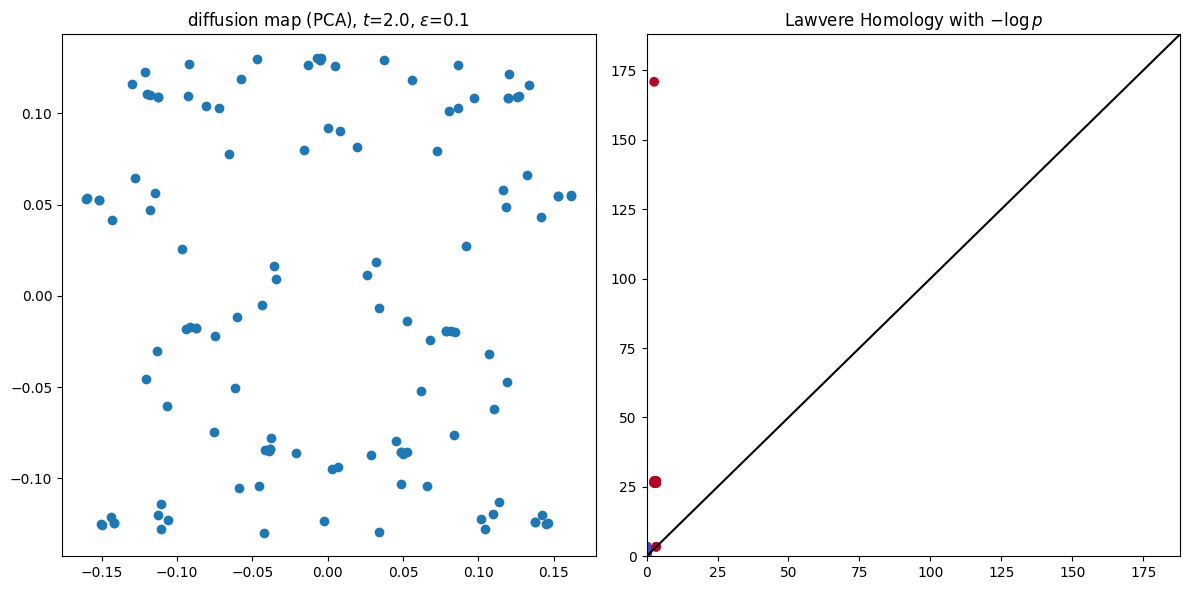

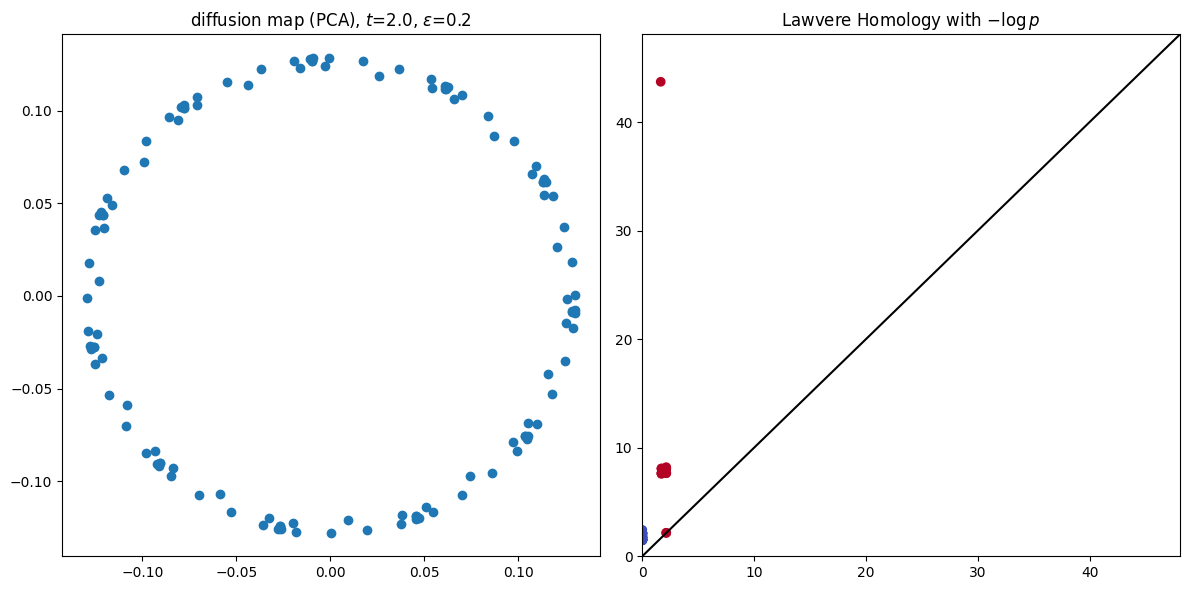

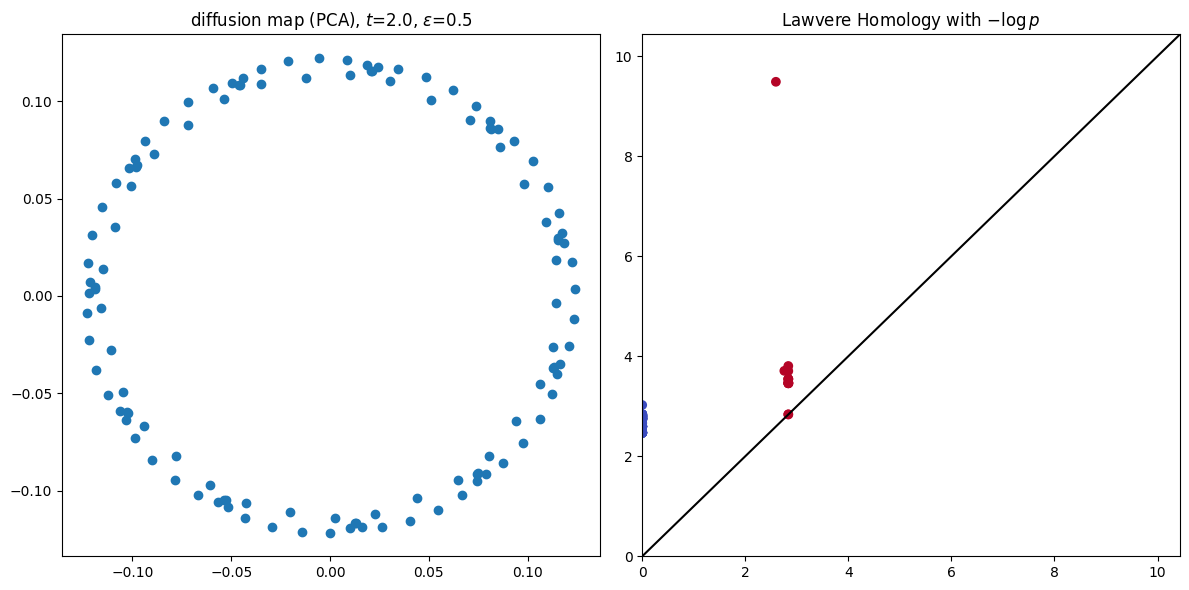

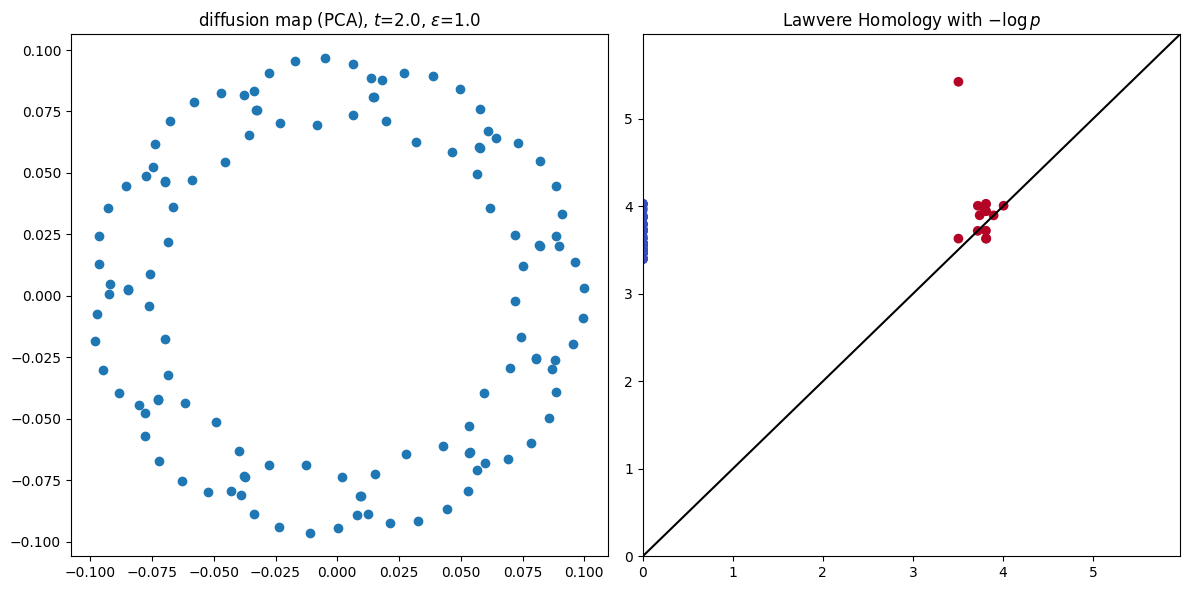

In [56]:
plot_logp(0.1)
plot_logp(0.2)
plot_logp(0.5)
plot_logp(1.)

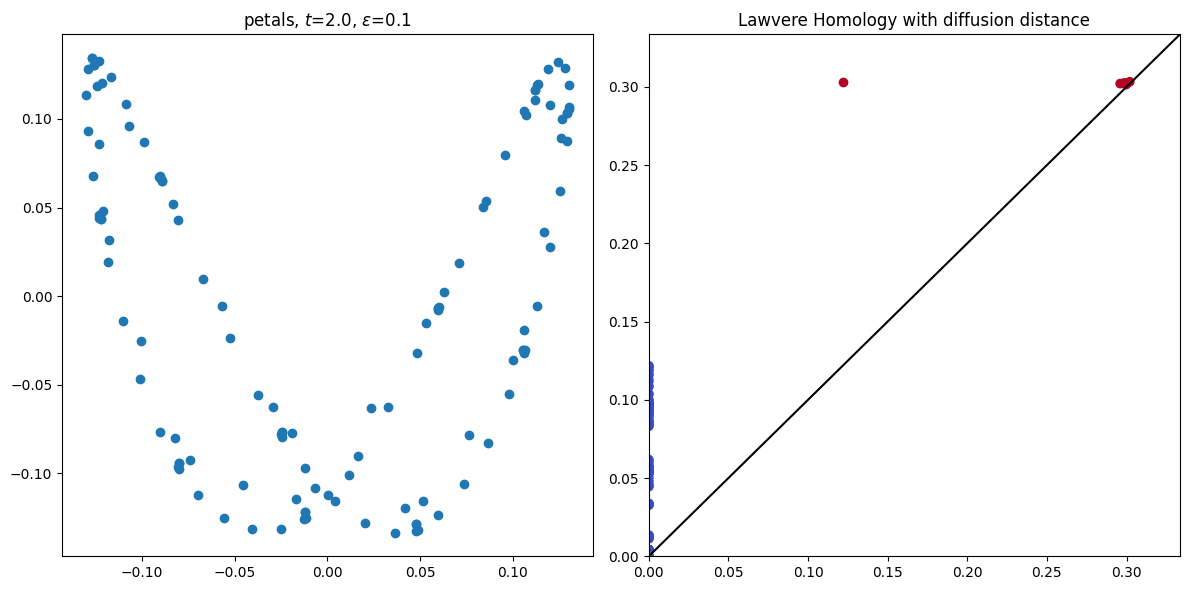

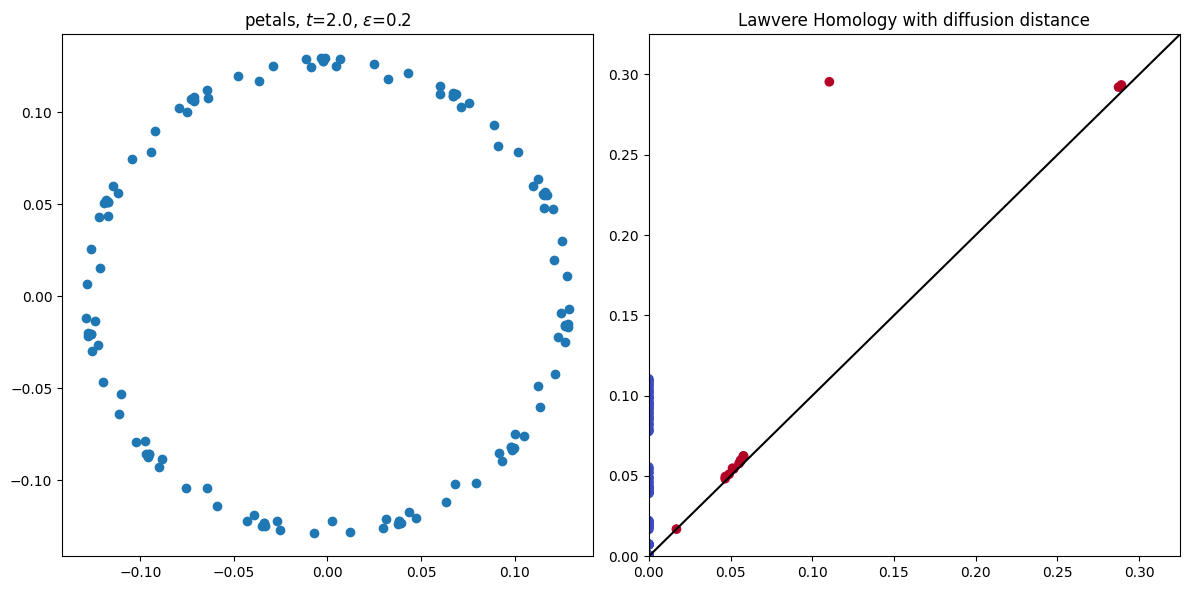

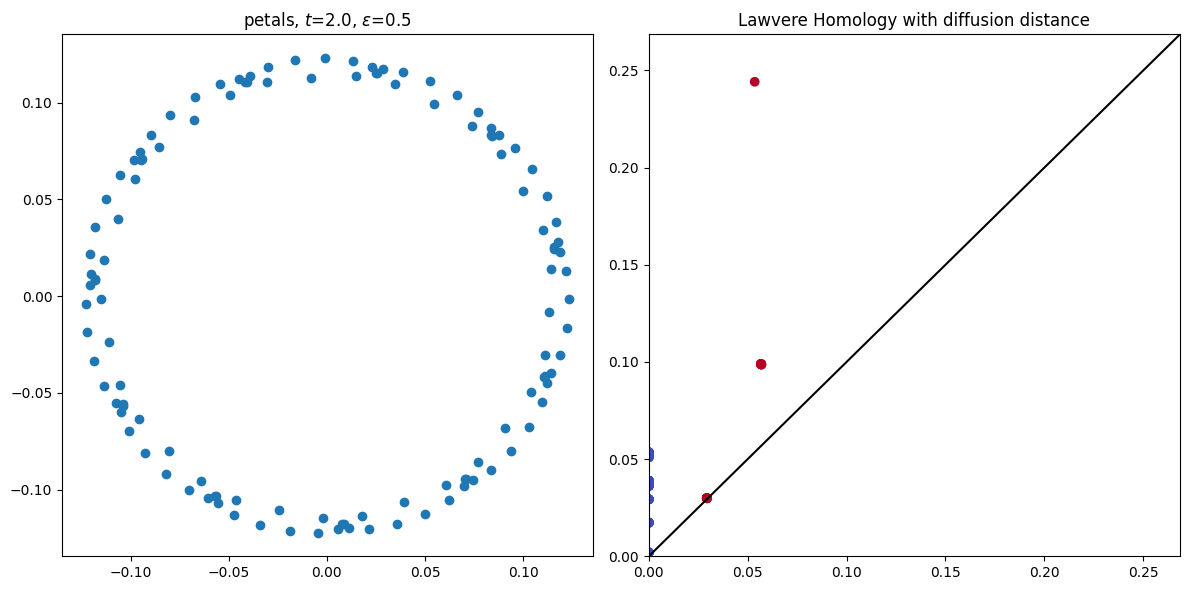

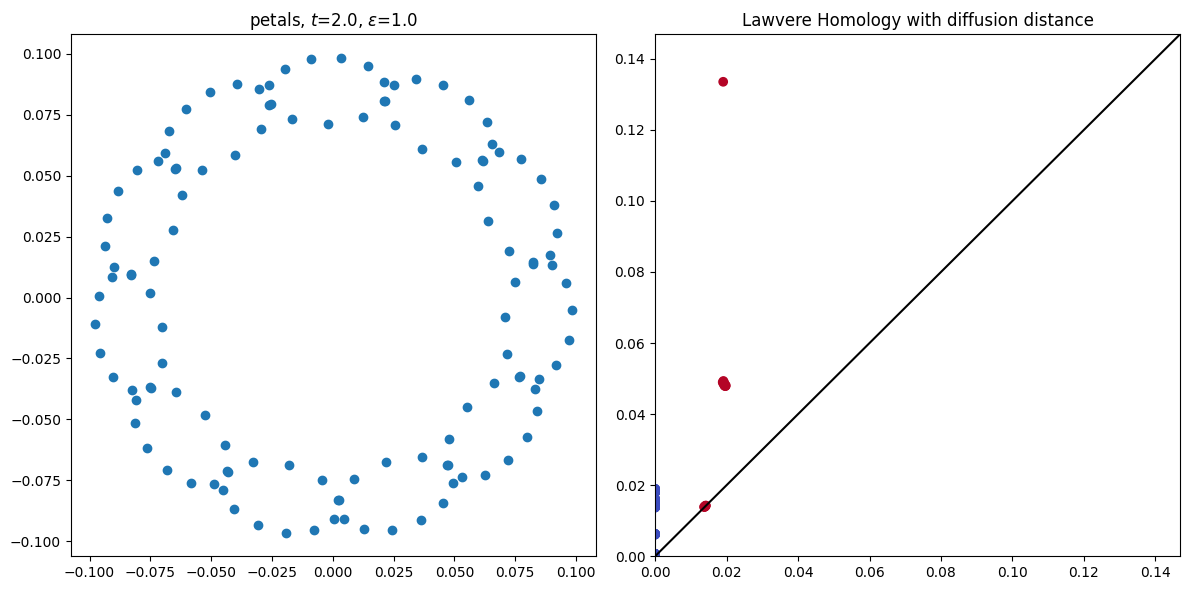

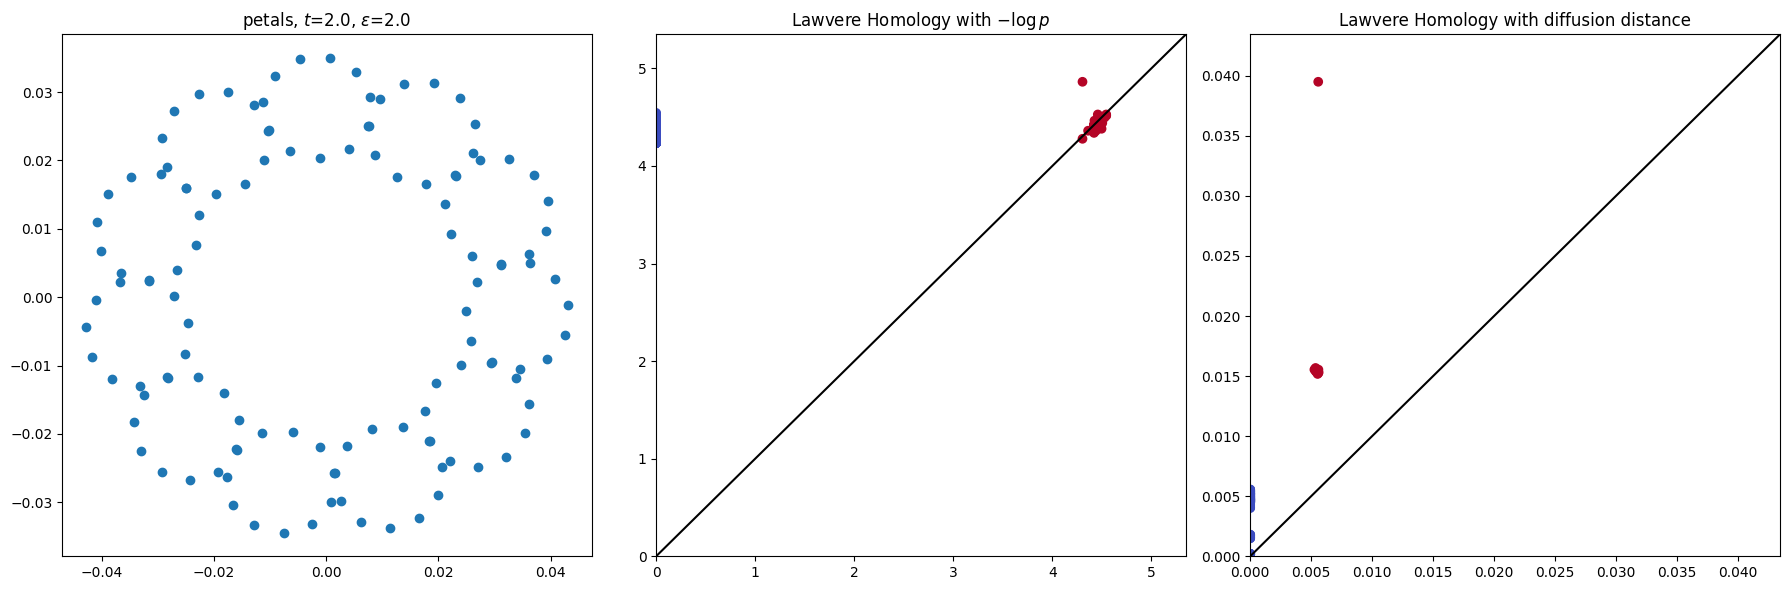

In [59]:
plot_diffu_dist(0.1)
plot_diffu_dist(0.2)
plot_diffu_dist(0.5)
plot_diffu_dist(1.)
plot_both(2.)

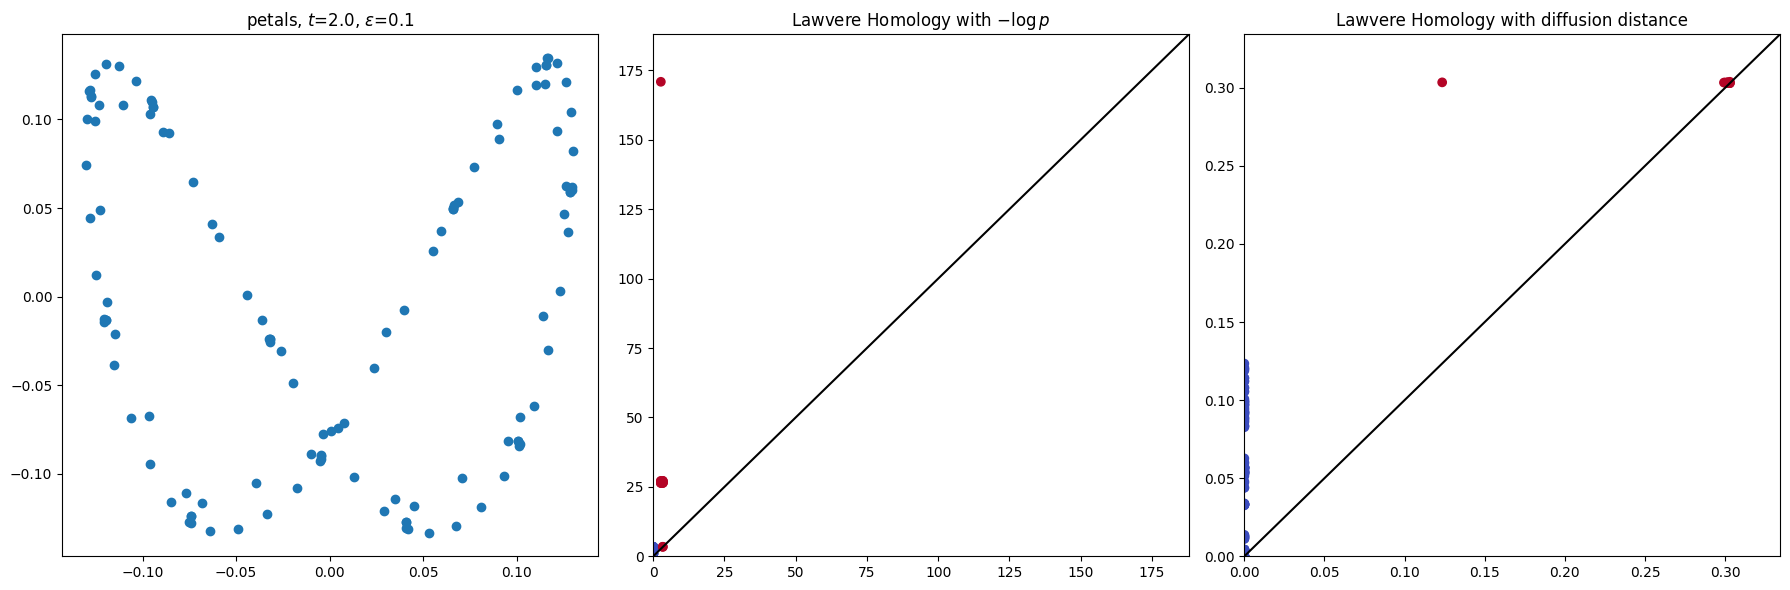

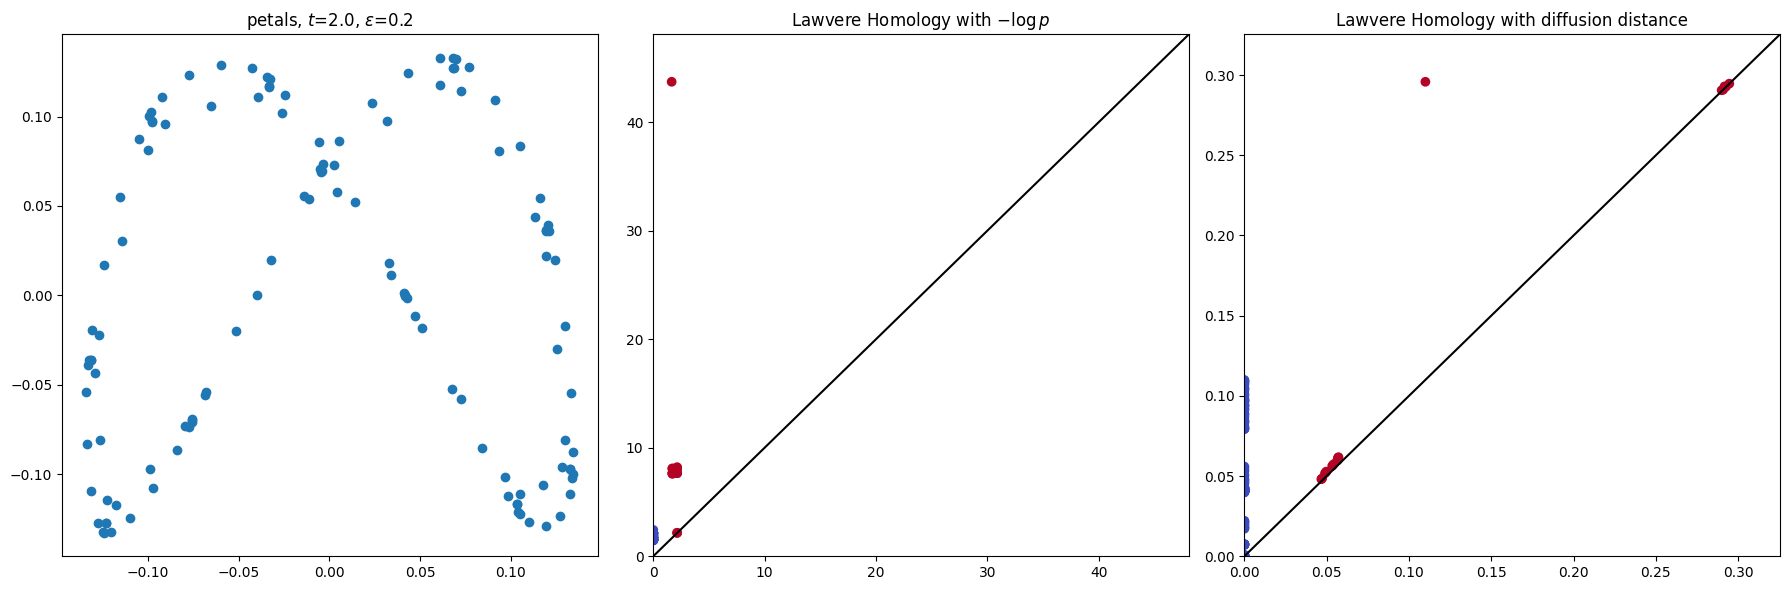

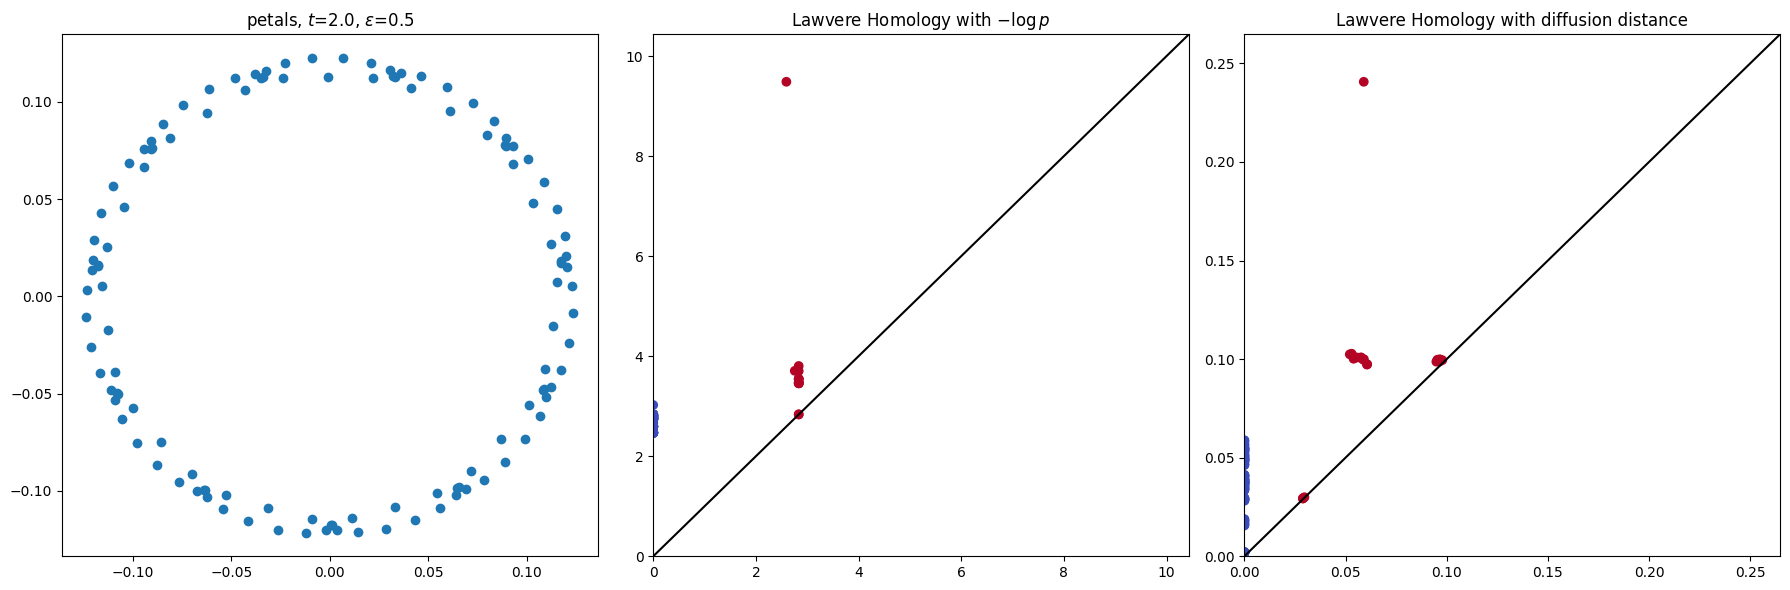

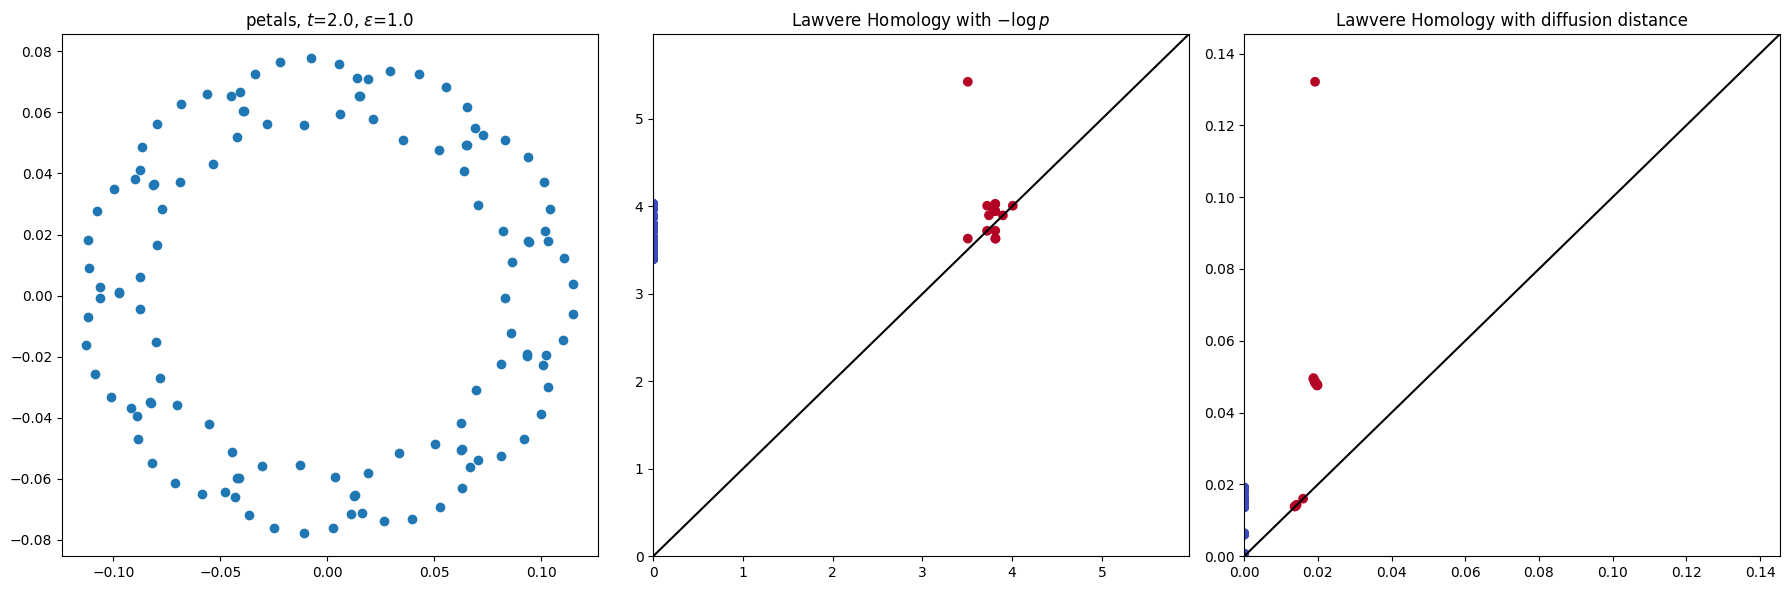

In [58]:
plot_both(0.1)
plot_both(0.2)
plot_both(0.5)
plot_both(1.)